very rudimentary algorithm to clean up the inference
* Filtering out uuids
* splitting inferences based on '_' and '-'
* filtering anything one worded(very unlikely that any inference would be single word)

In [8]:
import json
import uuid
import pandas as pd
import re

In [7]:
filepath = "Inferences.json"
with open(filepath, "r", encoding='utf-8') as file:
    inferences = json.load(file)["inferences"]

print(len(inferences))

178


In [17]:
uuid_re = re.compile("^[0-9a-f]{8}-[0-9a-f]{4}-[0-5][0-9a-f]{3}-[089ab][0-9a-f]{3}-[0-9a-f]{12}$")
def is_valid_uuid(__uuid):
    return bool(uuid_re.match(__uuid))

assert is_valid_uuid("e7fff09d-9c9e-4b81-8371-c79dd451ee35") == True
assert is_valid_uuid("d") == False
assert is_valid_uuid("c6cc8c20-88ef-11f0-8de9-0242ac120002") == True
assert is_valid_uuid("c6cc8c20-88ef-11f0-8de9-0242ac12000") == False

In [ ]:
uuid_filtered = []

for inf in inferences:
    if(not is_valid_uuid(inf)):
        uuid_filtered.append(inf)
print(len(uuid_filtered))

143


In [139]:
DASH = '-'
UNDERSCORE = '_'

inferences_co_occurances = []
inferences_keywords = []
for inf in uuid_filtered:
    # splitting based on dashes and underscores
    spliited_inf = list(map(lambda w: w.split(UNDERSCORE), inf.split(DASH)))

    
    # flattening
    flattend_inf = []
    for outtie in spliited_inf:
        if(isinstance(outtie, list)):
            for innie in outtie:
                flattend_inf.append(innie)

    # filtering
    # filtering out all single worded inferences like 04af72e7ec3a4aa58603fccafc9b61df (basically non uuid ids)
    # filtering out parties (1P, 2P, 3P)
    # # filtering out conjuntions like and, at,

    if(len(flattend_inf) == 1): continue 
    assert len(flattend_inf) != 1
    inferences_keywords.extend(flattend_inf)
    inferences_co_occurances.append(flattend_inf)
print(len(inferences_co_occurances))

129


In [153]:
# making hashmap
inferences_map = {}

for inf in inferences_keywords:
    if(inf not in inferences_map.keys()):
        inferences_map[inf] = 1
    else:
        inferences_map[inf] += 1
inferences_map = dict(sorted(inferences_map.items(), key = lambda item: item[1], reverse=True))
inferences_map

{'interest': 79,
 'Custom': 40,
 'and': 35,
 '1P': 34,
 'music': 20,
 'video': 14,
 'Streamers': 13,
 'Listeners': 13,
 '3P': 9,
 'interests': 9,
 'movies': 7,
 'Playlist': 6,
 'academic': 6,
 'healthy': 6,
 'living': 6,
 'travel': 6,
 'gaming': 6,
 'Content': 5,
 'Enthusiasts': 5,
 'family': 5,
 'news': 5,
 'politics': 5,
 'game': 5,
 'genres': 5,
 'Formula1': 4,
 'demographic': 4,
 'art': 4,
 'literature': 4,
 'business': 4,
 'finance': 4,
 'relationships': 4,
 'health': 4,
 'sports': 4,
 'games': 4,
 'Car': 3,
 'Affinity': 3,
 'Moment': 3,
 'Hub': 3,
 'FR': 3,
 'arts': 3,
 'social': 3,
 'books': 3,
 'parenting': 3,
 'fine': 3,
 'medical': 3,
 'services': 3,
 'childrens': 3,
 'hobbies': 3,
 'pop': 3,
 'Auto': 2,
 'Power': 2,
 'Language': 2,
 '10Kto20K': 2,
 'Device': 2,
 'UK': 2,
 'content': 2,
 'humanities': 2,
 'sciences': 2,
 'automotive': 2,
 'children': 2,
 'fitness': 2,
 'exercise': 2,
 'audio': 2,
 'culture': 2,
 'style': 2,
 'fashion': 2,
 'television': 2,
 'Android': 1,
 'Mo

In [147]:
unique_inf = list(inferences_map.keys())

# boolean for weather two keywords occur togheter or not
co_occurance_boolean_mat = pd.DataFrame(0, index=unique_inf, columns=unique_inf)
for row in inferences_co_occurances:
    for inf_1 in row:
        for inf_2 in row:
            if(inf_1 != inf_2) and (co_occurance_boolean_mat.at[inf_1, inf_2] == 0):
                co_occurance_boolean_mat.at[inf_1, inf_2] = 1

co_occurance_boolean_mat

interest  Custom  and  1P  music  video  Streamers  Listeners  \
interest            0       0    1   0      1      1          0          0   
Custom              0       0    0   1      0      0          1          1   
and                 1       0    0   0      1      1          0          0   
1P                  0       1    0   0      0      0          1          1   
music               1       0    1   0      0      1          0          0   
...               ...     ...  ...  ..    ...    ...        ...        ...   
trips               1       0    0   0      0      0          0          0   
casual              1       0    0   0      0      1          0          0   
educational         1       0    0   0      0      1          0          0   
party               1       0    1   0      1      1          0          0   
puzzle              1       0    0   0      0      1          0          0   

             3P  interests  ...  tv  europe  north  america  road  trips  \
interest      0          1  ...   1       1      1        1     1      1   
Custom        1          0  ...   0       0      0        0     0      0   
and           0          1  ...   0       0      0        0     0      0   
1P            0          0  ...   0       0      0        0     0      0   
music         0          1  ...   0       0      0        0     0      0   
...          ..        ...  ...  ..     ...    ...      ...   ...    ...   
trips         0          0  ...   0       0      0        0     1      0   
casual        0          0  ...   0       0      0        0     0      0   
educational   0          0  ...   0       0      0        0     0      0   
party         0          0  ...   0       0      0        0     0      0   
puzzle        0          0  ...   0       0      0        0     0      0   

             casual  educational  party  puzzle  
interest          1            1      1       1  
Custom            0            0      0       0  
and               0            0      1       0  
1P                0            0      0       0  
music             0            0      1       0  
...             ...          ...    ...     ...  
trips             0            0      0       0  
casual            0            0      0       0  
educational       0            0      0       0  
party             0            0      0       0  
puzzle            0            0      0       0  

[208 rows x 208 columns]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
inferences_frequency_ser = pd.Series(inferences_map)

In [46]:
%pip install networkx
import networkx as nx

  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
Using cached networkx-3.5-py3-none-any.whl (2.0 MB)
Note: you may need to restart the kernel to use updated packages.


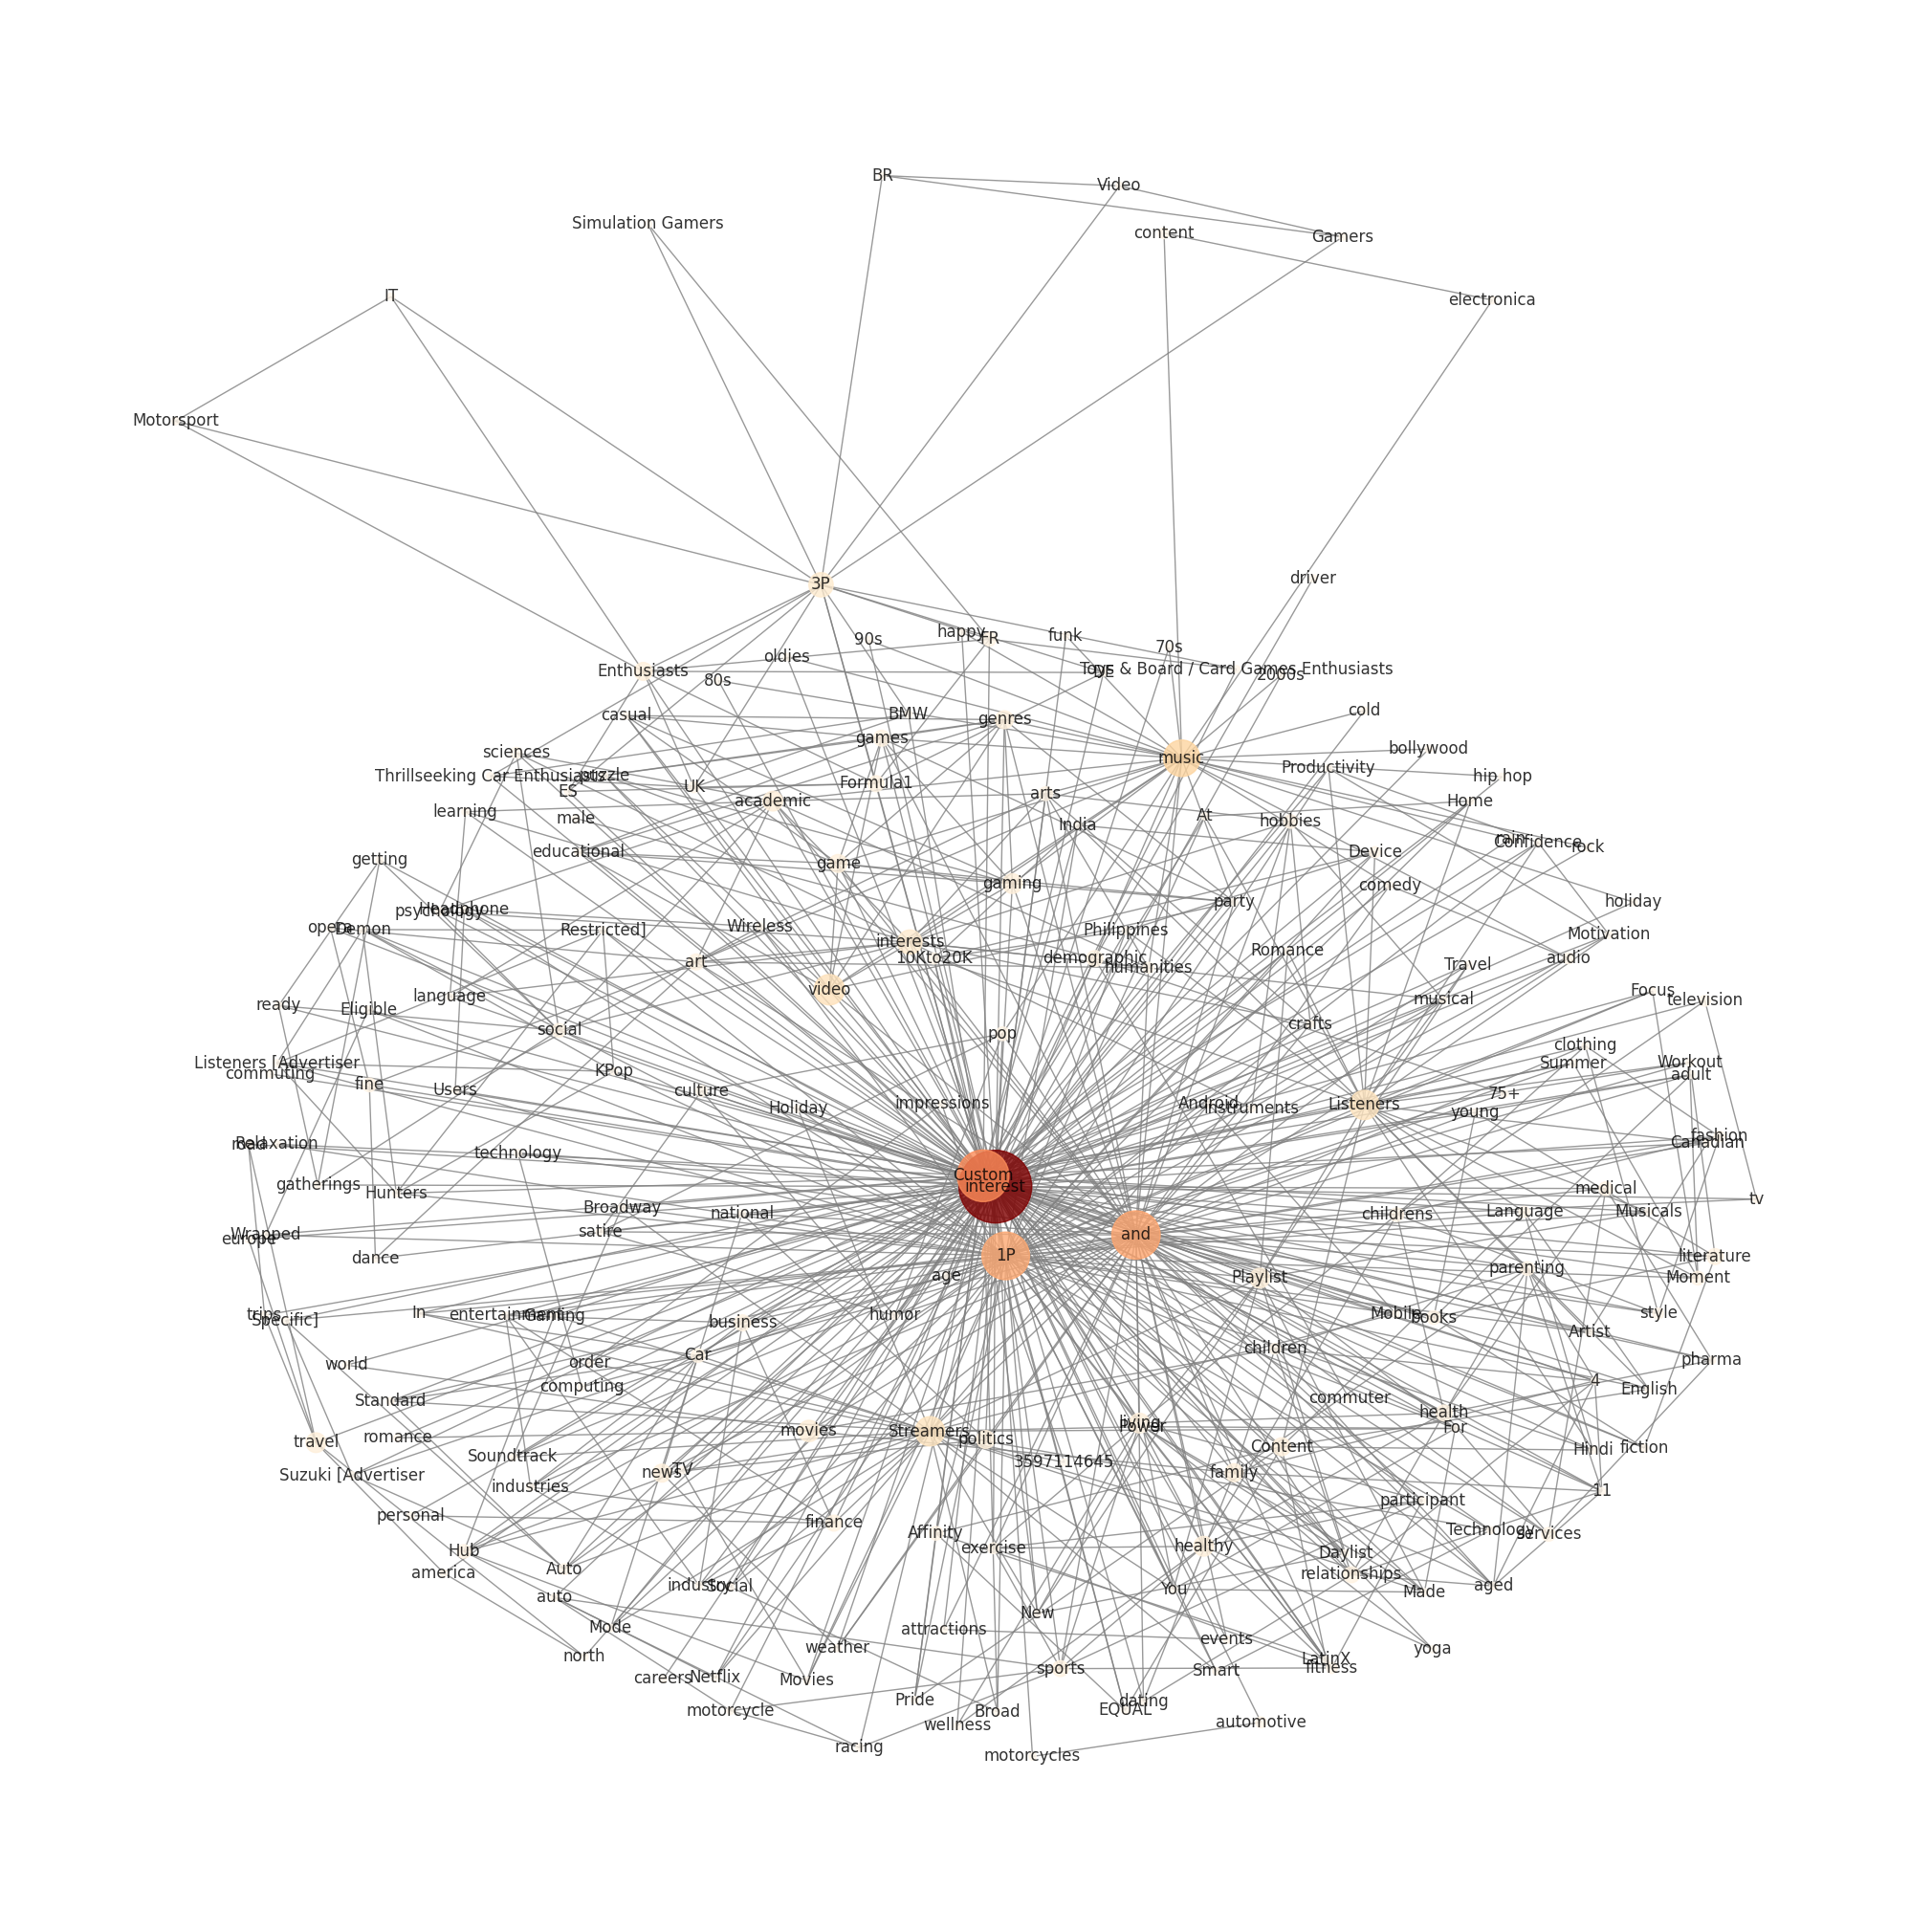

In [228]:
import numpy as np

threshold = 1
plt.figure(figsize=(20,20))

G = nx.Graph()
for inf, freq in inferences_map.items():
    G.add_node(inf)

for inf_1 in unique_inf:
    for inf_2 in unique_inf:
        if(inf_1 != inf_2) and (co_occurance_boolean_mat.at[inf_1, inf_2] == 1):
            G.add_edge(inf_1, inf_2)

raw_sizes = list(inferences_map.values())
sizes = np.interp(raw_sizes, (min(raw_sizes), max(raw_sizes)), (30, 3000))
labels = {k:k for k,v in inferences_map.items() if v >= threshold}
pos_init = nx.spring_layout(G, k=1.5, iterations=100)
pos = nx.kamada_kawai_layout(G, pos=pos_init, scale=4)  # refine positions
label_pos = {n: (x, y + 1000) for n, (x, y) in pos.items()}
    
nx.draw(
    G,
    label_pos,
    with_labels=True,
    labels=labels,
    node_size = sizes,
    node_color=inferences_map.values(),
    cmap=plt.cm.OrRd,
    edge_color="grey",
    font_color="black",
    alpha=0.8,
)
plt.show()

[79, 40, 35, 34, 20, 14, 13, 13, 9, 9, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


array([1303.63036304,  660.0660066 ,  577.55775578,  561.05610561,
        330.0330033 ,  231.02310231,  214.52145215,  214.52145215,
        148.51485149,  148.51485149,  115.51155116,   99.00990099,
         99.00990099,   99.00990099,   99.00990099,   99.00990099,
         99.00990099,   82.50825083,   82.50825083,   82.50825083,
         82.50825083,   82.50825083,   82.50825083,   82.50825083,
         66.00660066,   66.00660066,   66.00660066,   66.00660066,
         66.00660066,   66.00660066,   66.00660066,   66.00660066,
         66.00660066,   66.00660066,   49.5049505 ,   49.5049505 ,
         49.5049505 ,   49.5049505 ,   49.5049505 ,   49.5049505 ,
         49.5049505 ,   49.5049505 ,   49.5049505 ,   49.5049505 ,
         49.5049505 ,   49.5049505 ,   49.5049505 ,   49.5049505 ,
         49.5049505 ,   33.00330033,   33.00330033,   33.00330033,
         33.00330033,   33.00330033,   33.00330033,   33.00330033,
         33.00330033,   33.00330033,   33.00330033,   33.00330